### Analysis of Sales and Valuation Data 2024/25

#### System Setup

In [672]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [673]:
# importing dataset

df = pd.read_csv('all_sales_data_24_25.csv')
df = df.drop(0)
df = df.reset_index(drop = True)
df.head()


,SALE No.,DESPATCH DATE,GRADE,Unnamed: 3,Unnamed: 4,QTY,VALUE,QTY.1,Vlu P,Vlu pro,PROCEEDS,Asking P,Asking Pro,Def,Last bid
0,14.0,02.04.2024,NVK,2047,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN,NaN,NaN
1,14.0,02.04.2024,NaN,2048,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN,NaN,NaN
2,14.0,02.04.2024,NaN,2075,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN,NaN,NaN
3,14.0,02.04.2024,NaN,2073,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN,NaN,NaN
4,14.0,02.04.2024,NaN,2066,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN,NaN,NaN


In [674]:
df = df.drop(['GRADE','Unnamed: 3','Def','Last bid'],axis=1)
df = df.rename(columns = {
    'SALE No.' : 'Sale_No.',
    'Unnamed: 4' : 'Grade',
    'DESPATCH DATE' : 'Despatch_Date',
    'QTY' : 'Actual_Quantity',
    'VALUE' : 'Actual_Price',
    'QTY.1' : 'Valuation_Quantity',
    'Vlu P' : 'Valuation_Price',
    'Vlu pro' : 'Valuation_Proceeds',
    'PROCEEDS' : 'Actual_Proceeds',
    'Asking P' : 'Asking_Price',
    'Asking Pro' : 'Asking_Proceeds'
    })

In [675]:
df.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
0,14.0,02.04.2024,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN
1,14.0,02.04.2024,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN
2,14.0,02.04.2024,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN
3,14.0,02.04.2024,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN
4,14.0,02.04.2024,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN


In [676]:
dfw = df.copy() # dfw refers to dataframe_working (dfw)
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
0,14.0,02.04.2024,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN
1,14.0,02.04.2024,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN
2,14.0,02.04.2024,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN
3,14.0,02.04.2024,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN
4,14.0,02.04.2024,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN


#### Data Exploration

In [677]:
dfw.shape

(3362, 11)

In [678]:
dfw.columns

Index(['Sale_No.', 'Despatch_Date', 'Grade', 'Actual_Quantity', 'Actual_Price',
       'Valuation_Quantity', 'Valuation_Price', 'Valuation_Proceeds',
       'Actual_Proceeds', 'Asking_Price', 'Asking_Proceeds'],
      dtype='object')

In [679]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362 entries, 0 to 3361
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            3362 non-null   float64
 1   Despatch_Date       3362 non-null   object 
 2   Grade               3356 non-null   object 
 3   Actual_Quantity     3304 non-null   object 
 4   Actual_Price        3166 non-null   float64
 5   Valuation_Quantity  3345 non-null   float64
 6   Valuation_Price     3347 non-null   float64
 7   Valuation_Proceeds  3358 non-null   float64
 8   Actual_Proceeds     3350 non-null   object 
 9   Asking_Price        2682 non-null   float64
 10  Asking_Proceeds     2836 non-null   float64
dtypes: float64(7), object(4)
memory usage: 289.1+ KB


In [680]:
dfw.describe()

,Sale_No.,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Asking_Price,Asking_Proceeds
count,3362.000000,3166.000000,3345.000000,3347.000000,3.358000e+03,2682.000000,2.836000e+03
mean,25.007436,1502.286797,736.414649,1439.563788,9.974830e+05,1537.539150,9.899076e+05
std,12.823601,581.687648,371.562063,523.102672,5.376863e+05,585.982713,6.045494e+05
min,1.000000,730.000000,86.000000,730.000000,0.000000e+00,300.000000,0.000000e+00
25%,16.000000,1120.000000,500.000000,1100.000000,6.200000e+05,1185.000000,6.000000e+05
50%,24.000000,1430.000000,640.000000,1400.000000,8.400000e+05,1450.000000,8.400000e+05
75%,34.000000,1700.000000,920.000000,1650.000000,1.360000e+06,1750.000000,1.408000e+06
max,51.000000,6150.000000,1840.000000,5000.000000,3.680000e+06,5500.000000,3.680000e+06


In [681]:
dfw.nunique()

Sale_No.               51
Despatch_Date          70
Grade                  35
Actual_Quantity       115
Actual_Price          155
Valuation_Quantity    114
Valuation_Price       146
Valuation_Proceeds    866
Actual_Proceeds       918
Asking_Price          112
Asking_Proceeds       639
dtype: int64

In [682]:
dfw['Grade'].unique()

array(['OP1', 'OP', 'OPA', 'BOP1', 'PEKOE', 'PEKOE1', 'FBOP1', 'FBOP',
       'FBOPF1', 'FBOPF', 'FBOPFSp', 'FBOPFExSp1', 'FGS', 'DUST1',
       'FBOPFExSp', 'BM', 'BOP1A', 'BOP', 'PEK', 'PEK1', 'DUST', nan,
       'OP1 ', 'BP', 'DUST 1', 'FF1', 'FF', 'FFSp', 'FF(Ex)Sp1',
       'FF(Ex)Sp', 'BOPA', 'FFExSp1', 'FFExSp', '1A', 'BOPF', 'BOPFSp'],
      dtype=object)

In [683]:
dfw['Grade'].value_counts()

Grade
OP1           362
OPA           324
PEK           315
PEK1          275
FBOP          271
FBOPF1        245
OP            237
BOP1          229
BM            165
BOP1A         148
FBOP1         122
FGS           115
FF1            74
BOP            71
FBOPFSp        54
BOPA           54
FBOPFExSp1     53
FBOPFExSp      50
FBOPF          33
1A             26
DUST1          25
FFExSp         20
FFExSp1        20
FFSp           19
DUST           14
PEKOE          10
PEKOE1          8
FF              4
BOPFSp          4
BP              3
BOPF            2
FF(Ex)Sp1       1
FF(Ex)Sp        1
DUST 1          1
OP1             1
Name: count, dtype: int64

#### Data Preprocessing

##### Data Cleansing

In [684]:
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
0,14.0,02.04.2024,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN
1,14.0,02.04.2024,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN
2,14.0,02.04.2024,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN
3,14.0,02.04.2024,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN
4,14.0,02.04.2024,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN


In [685]:
# handling missing values

dfw.isnull().sum()

Sale_No.                0
Despatch_Date           0
Grade                   6
Actual_Quantity        58
Actual_Price          196
Valuation_Quantity     17
Valuation_Price        15
Valuation_Proceeds      4
Actual_Proceeds        12
Asking_Price          680
Asking_Proceeds       526
dtype: int64

In [686]:
# comparing Actual quantity and Valuation Quantity

# extracting numerical values only from the Actual quantity column

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity"].str.extract(r"(\d+\.?\d*)") # Extract only numbers (integers or decimals)
dfw["Actual_Quantity_numeric_only"] = pd.to_numeric(dfw["Actual_Quantity_numeric_only"]) # Convert to numeric

# comparison

diff_mask = dfw["Actual_Quantity_numeric_only"] != dfw["Valuation_Quantity"]
differences = dfw[diff_mask]

differences


,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity_numeric_only
8,14.0,02.04.2024,PEKOE,NaN,NaN,1360.0,1360.0,1849600.0,0,NaN,NaN,NaN
9,14.0,02.04.2024,PEKOE,NaN,NaN,680.0,1340.0,911200.0,0,NaN,NaN,NaN
30,14.0,02.04.2024,PEKOE,NaN,NaN,1120.0,1000.0,1120000.0,0,NaN,NaN,NaN
66,15.0,16.04.2024,OPA,NaN,NaN,880.0,1260.0,1108800.0,0,NaN,NaN,NaN
73,15.0,16.04.2024,FBOPFExSp,NaN,NaN,88.0,2500.0,220000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3268,30.0,2025.08.04,OP1,Unsold,NaN,1320.0,1300.0,1716000.0,0,1400.0,1848000.0,NaN
3277,30.0,2025.08.04,BOP1,Unsold,NaN,760.0,1550.0,1178000.0,0,1600.0,1216000.0,NaN
3300,30.0,2025.08.04,OP1,Unsold,NaN,1200.0,1150.0,1380000.0,0,1200.0,1440000.0,NaN
3317,31.0,2025.08.12,OP1,Unsold,NaN,340.0,2000.0,680000.0,0,2200.0,748000.0,NaN


In [687]:
# Replace NaN values in Actual_Quantity_numeric_only 
# with corresponding values from Valuation_Quantity

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity_numeric_only"].fillna(dfw["Valuation_Quantity"])
dfw = dfw.drop(['Actual_Quantity'],axis =1)
dfw = dfw.rename(columns = {
        "Actual_Quantity_numeric_only" : 'Actual_Quantity'
    })

dfw.isnull().sum()

Sale_No.                0
Despatch_Date           0
Grade                   6
Actual_Price          196
Valuation_Quantity     17
Valuation_Price        15
Valuation_Proceeds      4
Actual_Proceeds        12
Asking_Price          680
Asking_Proceeds       526
Actual_Quantity        17
dtype: int64

In [688]:
# Extract text from Actual_Proceeds 

dfw["Actual_Proceeds"] = dfw["Actual_Price"] * dfw["Actual_Quantity"] 
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362 entries, 0 to 3361
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            3362 non-null   float64
 1   Despatch_Date       3362 non-null   object 
 2   Grade               3356 non-null   object 
 3   Actual_Price        3166 non-null   float64
 4   Valuation_Quantity  3345 non-null   float64
 5   Valuation_Price     3347 non-null   float64
 6   Valuation_Proceeds  3358 non-null   float64
 7   Actual_Proceeds     3164 non-null   float64
 8   Asking_Price        2682 non-null   float64
 9   Asking_Proceeds     2836 non-null   float64
 10  Actual_Quantity     3345 non-null   float64
dtypes: float64(9), object(2)
memory usage: 289.1+ KB


In [689]:
dfw.isnull().sum()

Sale_No.                0
Despatch_Date           0
Grade                   6
Actual_Price          196
Valuation_Quantity     17
Valuation_Price        15
Valuation_Proceeds      4
Actual_Proceeds       198
Asking_Price          680
Asking_Proceeds       526
Actual_Quantity        17
dtype: int64

In [690]:
# Replace 0 with NaN (null)

dfw = dfw.replace(0, np.nan)
dfw.isnull().sum()

Sale_No.                0
Despatch_Date           0
Grade                   6
Actual_Price          196
Valuation_Quantity     17
Valuation_Price        15
Valuation_Proceeds     17
Actual_Proceeds       198
Asking_Price          680
Asking_Proceeds       729
Actual_Quantity        17
dtype: int64

In [691]:
dfw = dfw.dropna(subset=["Grade","Actual_Price","Actual_Quantity"])

from datetime import datetime

# Function to parse both formats
def parse_mixed_date(date_str):
    for fmt in ("%d.%m.%Y", "%Y.%m.%d"):
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT  # If it doesn't match any format

# Apply the function
dfw["Despatch_Date"] = dfw["Despatch_Date"].apply(parse_mixed_date)

dfw

,Sale_No.,Despatch_Date,Grade,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity
0,14.0,2024-04-02,OP1,3600.0,350.0,3500.0,1225000.0,1260000.0,NaN,NaN,350.0
1,14.0,2024-04-02,OP1,1950.0,680.0,2000.0,1360000.0,1326000.0,NaN,NaN,680.0
2,14.0,2024-04-02,OP1,1800.0,640.0,1900.0,1216000.0,1152000.0,NaN,NaN,640.0
3,14.0,2024-04-02,OP,1460.0,640.0,1500.0,960000.0,934400.0,NaN,NaN,640.0
4,14.0,2024-04-02,OPA,1460.0,520.0,1450.0,754000.0,759200.0,NaN,NaN,520.0
...,...,...,...,...,...,...,...,...,...,...,...
3357,31.0,2025-08-12,BM,870.0,760.0,900.0,684000.0,661200.0,950.0,722000.0,760.0
3358,31.0,2025-08-12,BOP1A,850.0,1040.0,840.0,873600.0,884000.0,860.0,894400.0,1040.0
3359,31.0,2025-08-12,BOP1A,800.0,520.0,830.0,431600.0,416000.0,850.0,442000.0,520.0
3360,31.0,2025-08-12,BOP1A,830.0,520.0,850.0,442000.0,431600.0,870.0,452400.0,520.0


In [692]:
dfc = dfw.dropna()

In [693]:
dfc.isnull().sum()

Sale_No.              0
Despatch_Date         0
Grade                 0
Actual_Price          0
Valuation_Quantity    0
Valuation_Price       0
Valuation_Proceeds    0
Actual_Proceeds       0
Asking_Price          0
Asking_Proceeds       0
Actual_Quantity       0
dtype: int64

In [694]:
dfc.shape

(2490, 11)

In [695]:
# Removing duplicates

dfc.duplicated()
dfc.shape

(2490, 11)

In [696]:
dfc.dtypes

Sale_No.                     float64
Despatch_Date         datetime64[ns]
Grade                         object
Actual_Price                 float64
Valuation_Quantity           float64
Valuation_Price              float64
Valuation_Proceeds           float64
Actual_Proceeds              float64
Asking_Price                 float64
Asking_Proceeds              float64
Actual_Quantity              float64
dtype: object

In [697]:

# Columns to sum
sum_cols = ["Valuation_Quantity","Actual_Quantity", "Valuation_Proceeds", "Asking_Proceeds", "Actual_Proceeds"]

# Group by Despatch_Date and sum the specified columns
df_sum = dfc.groupby("Despatch_Date")[sum_cols].sum().reset_index()

# Calculate Actual_Price and Valuation_Price per unit
df_sum["Actual_Price"] = df_sum["Actual_Proceeds"] / df_sum["Actual_Quantity"]
df_sum["Valuation_Price"] = df_sum["Valuation_Proceeds"] / df_sum["Valuation_Quantity"]
df_sum["Asking_Price"] = df_sum["Asking_Proceeds"] / df_sum["Valuation_Quantity"]

# Optional: reorder columns
df_avg = df_sum[["Despatch_Date","Valuation_Price","Asking_Price" ,"Actual_Price",] + sum_cols]

df_avg.head()


,Despatch_Date,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
0,2024-06-18,1505.630642,1620.470439,1585.809282,31460.0,31460.0,47367140.0,50980000.0,49889560.0
1,2024-06-25,1365.785975,1486.680530,1440.663758,29333.0,29333.0,40062600.0,43608800.0,42258990.0
2,2024-07-02,1372.433797,1474.718144,1450.911117,30512.0,30512.0,41875700.0,44996600.0,44270200.0
3,2024-07-09,1472.174649,1605.408699,1507.984431,29545.0,29545.0,43495400.0,47431800.0,44553400.0
4,2024-07-16,1434.404112,1535.525217,1503.212978,31130.0,31130.0,44653000.0,47800900.0,46795020.0


In [698]:
df_avg.shape

(55, 9)

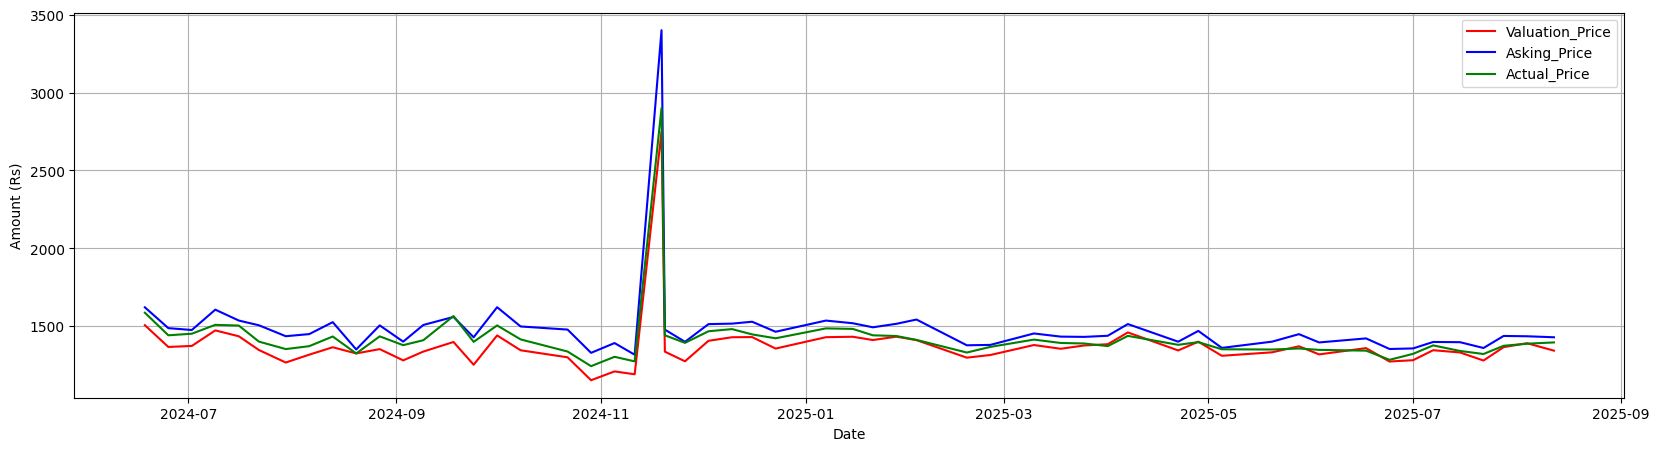

In [699]:
# plotting Valuation_Price , Asking_Price and Actual_Price
plt.figure(figsize=(20,5))
plt.plot(df_avg['Despatch_Date'],df_avg['Valuation_Price'],label = 'Valuation_Price', color = 'red')
plt.plot(df_avg['Despatch_Date'],df_avg['Asking_Price'],label = 'Asking_Price', color = 'blue')
plt.plot(df_avg['Despatch_Date'],df_avg['Actual_Price'],label = 'Actual_Price', color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()